C:\Users\Sule Odu Shbomi\anaconda3\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_34752\621170895.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


   AGE GENDER   ZONE SUB_SEGMENT MARITAL_STATUS           EMPLOYMENT_STATUS  \
0   45      M  zone2    product8        MARRIED  EMPLOYED FULL TIME - OTHER   
1   40      F  zone1    product7        MARRIED  EMPLOYED PART TIME - OTHER   
2   66      M  zone6    product6        OTHERS   EMPLOYED FULL TIME - OTHER   
3   61      F  zone1    product6        MARRIED  EMPLOYED FULL TIME - OTHER   
4   55      M  zone2    product6         SINGLE  EMPLOYED FULL TIME - OTHER   

   Internet_banking  Mobile_Banking  USSD   PROFTI   ...     DR SUM   \
0                 1               1     1     877.5  ...  2245606.03   
1                 1               1     1       0.0  ...         0.0   
2                 1               1     1       0.0  ...         0.0   
3                 0               0     0       0.0  ...         0.0   
4                 0               0     1       0.0  ...         0.0   

      CR SUM   CURRENT ACCOUNT PERSONAL LOAN  VAF LOAN  HOME LOAN  \
0  2679077.96          

No negative values found in numerical columns.
    AGE  Internet_banking  Mobile_Banking  USSD   PROFTI    BAL_SUM   \
0  45.0               1.0             1.0   1.0     877.5   555252.1   
1  40.0               1.0             1.0   1.0       0.0     5252.0   
2  66.0               1.0             1.0   1.0       0.0   919392.5   
3  61.0               0.0             0.0   0.0       0.0  2117962.6   
4  55.0               0.0             0.0   1.0       0.0     1076.4   

   DR COUNT  CR COUNT     DR SUM      CR SUM   ...  MARITAL_STATUS_WIDOWED  \
0       187      32.5  2245606.03  2679077.96  ...                       0   
1       104     143.0        0.00  2231710.00  ...                       0   
2         0       0.0        0.00        0.00  ...                       0   
3         0       0.0        0.00        0.00  ...                       0   
4         0       0.0        0.00        0.00  ...                       0   

   EMPLOYMENT_STATUS_CONTRACTOR  EMPLOYMENT_STATUS_

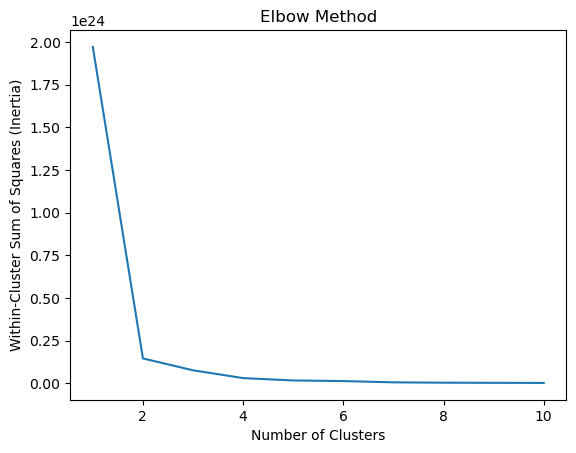

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['Acct_ID', 'AGE INTERVAL'], axis='columns', inplace=True)

# Print the dataframe to see if it's correctly loaded
print(df.head())

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Print the dataframe after one-hot encoding
print(dfs.head())

# Remove commas, non-numeric characters, and convert 'BAL_SUM' and ' PROFTI ' columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Print the dataframe after converting numeric columns
print(dfs.head())

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT', 
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

# List to store columns with negative values
columns_with_negative_values = []

# Iterate over numerical columns to handle negative values and locate them
for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)
    
    # Locate negative values
    negative_rows = dfs[dfs[column] < 0]
    if not negative_rows.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_rows)
        columns_with_negative_values.append(column)

# Print columns with negative values
if not columns_with_negative_values:
    print("No negative values found in numerical columns.")
else:
    print("Columns with negative values:")
    print(columns_with_negative_values)

# Select numerical columns (excluding 'Acct_ID')
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD',  'CURRENT ACCOUNT', 
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Print the dataframe after handling NaN or infinity values
print(dfs.head())

# Check if any column contains non-numeric values
non_numeric_columns = dfs.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    print("Columns with non-numeric values:")
    print(non_numeric_columns)
    # Optionally, print rows with non-numeric values for each column
    for column in non_numeric_columns:
        non_numeric_rows = dfs[dfs[column].apply(lambda x: isinstance(x, str))]
        print(f"Rows with non-numeric values in column '{column}':")
        print(non_numeric_rows)
else:
    print("All columns contain numeric values. Fitting KMeans model...")

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()


C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_34752\995858589.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


No negative values found in numerical columns.
    AGE  Internet_banking  Mobile_Banking  USSD   PROFTI    BAL_SUM   \
0  45.0               1.0             1.0   1.0     877.5   555252.1   
1  40.0               1.0             1.0   1.0       0.0     5252.0   
2  66.0               1.0             1.0   1.0       0.0   919392.5   
3  61.0               0.0             0.0   0.0       0.0  2117962.6   
4  55.0               0.0             0.0   1.0       0.0     1076.4   

   DR COUNT  CR COUNT     DR SUM      CR SUM   ...  MARITAL_STATUS_WIDOWED  \
0       187      32.5  2245606.03  2679077.96  ...                       0   
1       104     143.0        0.00  2231710.00  ...                       0   
2         0       0.0        0.00        0.00  ...                       0   
3         0       0.0        0.00        0.00  ...                       0   
4         0       0.0        0.00        0.00  ...                       0   

   EMPLOYMENT_STATUS_CONTRACTOR  EMPLOYMENT_STATUS_

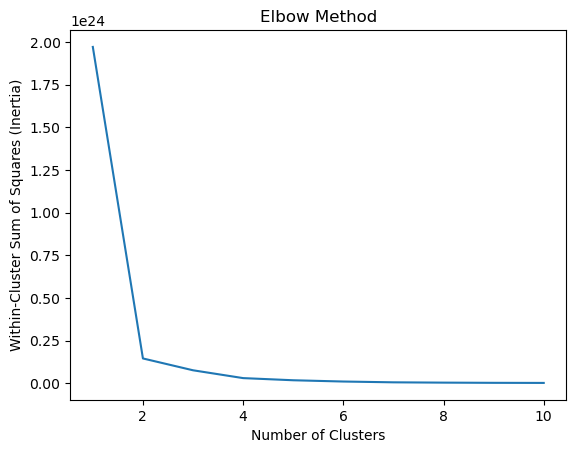

Number of Clusters: 1, Inertia: 1.9719793628420493e+24
Number of Clusters: 2, Inertia: 1.4546790978618786e+23
Number of Clusters: 3, Inertia: 7.609491068985042e+22
Number of Clusters: 4, Inertia: 3.020355571413727e+22
Number of Clusters: 5, Inertia: 1.7597429771263128e+22
Number of Clusters: 6, Inertia: 1.016332965377055e+22
Number of Clusters: 7, Inertia: 5.479419239306264e+21
Number of Clusters: 8, Inertia: 3.701663651752036e+21
Number of Clusters: 9, Inertia: 2.5288977656331596e+21
Number of Clusters: 10, Inertia: 1.9874024190127256e+21


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['Acct_ID', 'AGE INTERVAL'], axis='columns', inplace=True)

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Remove commas, non-numeric characters, and convert 'BAL_SUM' and ' PROFTI ' columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT', 
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

# List to store columns with negative values
columns_with_negative_values = []

# Iterate over numerical columns to handle negative values and locate them
for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)
    
    # Locate negative values
    negative_rows = dfs[dfs[column] < 0]
    if not negative_rows.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_rows)
        columns_with_negative_values.append(column)

# Print columns with negative values
if not columns_with_negative_values:
    print("No negative values found in numerical columns.")
else:
    print("Columns with negative values:")
    print(columns_with_negative_values)

# Select numerical columns (excluding 'Acct_ID')
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD',  'CURRENT ACCOUNT', 
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Print the dataframe after handling NaN or infinity values
print(dfs.head())

# Check if any column contains non-numeric values
non_numeric_columns = dfs.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    print("Columns with non-numeric values:")
    print(non_numeric_columns)
    # Optionally, print rows with non-numeric values for each column
    for column in non_numeric_columns:
        non_numeric_rows = dfs[dfs[column].apply(lambda x: isinstance(x, str))]
        print(f"Rows with non-numeric values in column '{column}':")
        print(non_numeric_rows)
else:
    print("All columns contain numeric values. Fitting KMeans model...")

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

# Print the inertia values
for i, inertia_value in enumerate(inertia):
    print(f"Number of Clusters: {i+1}, Inertia: {inertia_value}")


C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_34752\2130167399.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


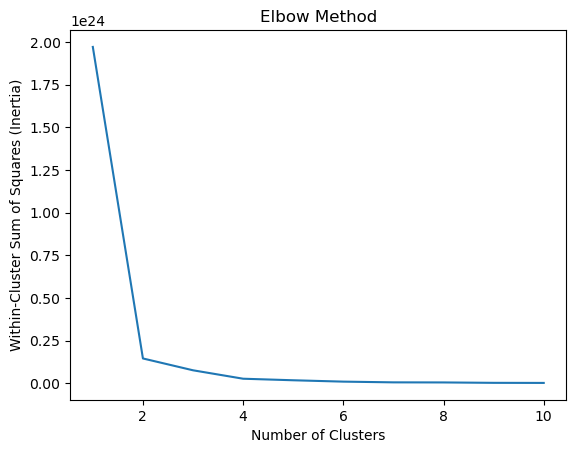

500000
499999


In [3]:
# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['Acct_ID'], axis='columns', inplace=True)  # Remove 'Acct_ID' and 'PREDEFINED_SEGMENT'

# Use 'AGE INTERVAL' as predefined segments
predefined_segments = df['AGE INTERVAL']  # Assuming 'AGE INTERVAL' column exists in your dataset
df.drop('AGE INTERVAL', axis='columns', inplace=True)  # Remove 'AGE INTERVAL' from the dataframe

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Remove commas, non-numeric characters, and convert 'BAL_SUM' and 'PROFTI' columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS',
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

# Iterate over numerical columns to handle negative values and locate them
for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)

# Select numerical columns (excluding 'Acct_ID')
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

# Assuming you have 'AGE INTERVAL' as predefined segments, compare them with the clusters obtained from KMeans
# For demonstration purposes, let's print a confusion matrix
from sklearn.metrics import confusion_matrix

# Get cluster labels from KMeans
cluster_labels = model.labels_

# Find the index of the missing sample in predefined_segments
missing_index = predefined_segments.index.difference(df.index)

# Drop the row with the missing sample from predefined_segments
predefined_segments = predefined_segments.drop(missing_index)

# Now both arrays should have equal lengths
print(len(predefined_segments))
print(len(cluster_labels))
# Construct confusion matrix
#cm = confusion_matrix(predefined_segments, cluster_labels)

# Print confusion matrix
#print("Confusion Matrix:")
#print(cm)


C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_34752\3748902730.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


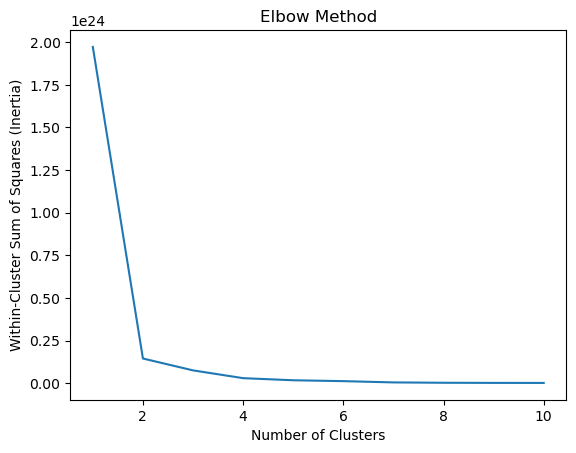

499999
499999


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['AGE INTERVAL'], axis='columns', inplace=True)  # Remove 'AGE INTERVAL'

# Use 'Acct_ID' as predefined segments
predefined_segments = df['Acct_ID']  # Assuming 'Acct_ID' column exists in your dataset
df.drop('Acct_ID', axis='columns', inplace=True)  # Remove 'Acct_ID' from the dataframe

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Convert numerical columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS',
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)

# Select numerical columns
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

# Get cluster labels from KMeans
cluster_labels = model.labels_

# Check if predefined_segments has NaN values
nan_indices = predefined_segments.index[predefined_segments.isna()]
# Drop rows with NaN values from predefined_segments
predefined_segments = predefined_segments.dropna()
# Drop the last element from predefined_segments to match the length of cluster_labels
predefined_segments = predefined_segments.iloc[:-1]

# Now both arrays should have equal lengths
print(len(predefined_segments))
print(len(cluster_labels))

# Convert predefined_segments to numeric if necessary
if predefined_segments.dtype != 'int':
    predefined_segments = pd.to_numeric(predefined_segments, errors='coerce')

# Construct confusion matrix
#cm = confusion_matrix(predefined_segments, cluster_labels)

# Print confusion matrix
#print("Confusion Matrix:")
#print(cm)
